# **Week 7 - Exam**
***Théophane DELBAUFFE***

## Requirements

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras import regularizers

try:
  %tensorflow_version 2.x
except Exception:
  pass

## Loading Dataset

In [163]:
df_train = np.loadtxt("satimage_train_5.txt")
print("Train : ", df_train.shape)
X_train = df_train[:,0:len(df_train[0])-1]
y_train = df_train[:,-1]
print(X_train.shape, y_train.shape)

df_test = np.loadtxt("satimage_test.txt")
print("\nTest : ", df_test.shape)
X_test = df_test[:,0:len(df_test[0])-1]
y_test = df_test[:,-1]
print(X_test.shape, y_test.shape)

Train :  (4435, 37)
(4435, 36) (4435,)

Test :  (2000, 37)
(2000, 36) (2000,)


## Pre-Processing

One-hot encoding

In [164]:
y_train = to_categorical(y_train-1, num_classes=7)
y_test = to_categorical(y_test-1, num_classes=7)

Normalization

In [231]:
X_train_scaled = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_scaled = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

## Models

In [175]:
def plotting(hist_model):
  plt.figure(figsize=(20,5))

  plt.subplot(1,2,1)
  plt.title("Loss")
  plt.plot(hist_model.history["val_loss"], label="val_loss", color="b")
  plt.plot(hist_model.history["loss"], label="train_loss", color="r")
  plt.legend()

  plt.subplot(1,2,2)
  plt.title("Accuracy")
  plt.plot(hist_model.history["val_acc"], label="val_acc", color="b")
  plt.plot(hist_model.history["acc"], label="train_acc", color="r")
  plt.legend()
  plt.show()

### 1. First classic parameters
- 2 Hidden layers (of 36 and 8 units + ReLU)
- Output layer : 7 units + Softmax (because classification)
- Loss function : Categorical Crossentropy (because Multi-label classification)
- Metric : Accuracy
- I put 50 epochs because I saw after many try that it was sufficient
- And a batch-size of 32, which is a classic value for this hyper-parameter

In [178]:
model = keras.Sequential([
      keras.layers.Dense(units=36, activation="relu", input_shape=(36,)),
      keras.layers.Dense(units=8, activation="relu"),
      keras.layers.Dense(units=7, activation="softmax")
])

model.compile(
    loss="categorical_crossentropy",
    metrics="acc"
)

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 36)                1332      
                                                                 
 dense_94 (Dense)            (None, 8)                 296       
                                                                 
 dense_95 (Dense)            (None, 7)                 63        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________


In [179]:
hist_model = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test,y_test), verbose=0)

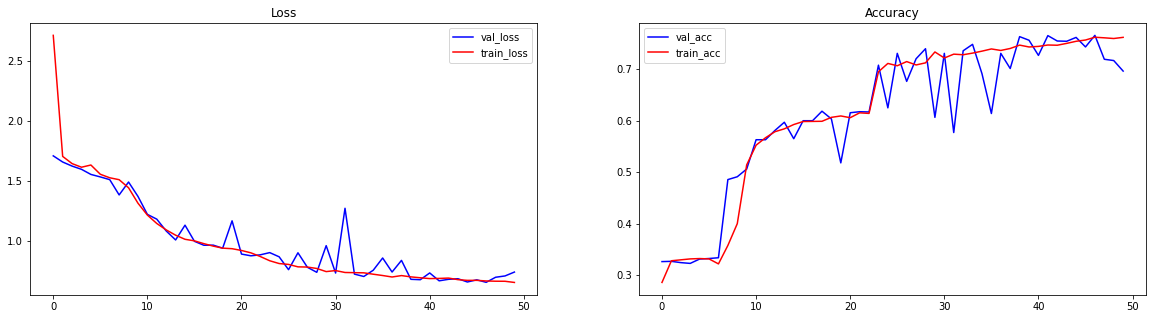

In [180]:
plotting(hist_model)

### 2. Optimizer
- I added the RMSProp opitmizer

The result got a little bit better, with a smoother curve for both loss and accuracy

In [181]:
model = keras.Sequential([
      keras.layers.Dense(units=36, activation="relu", input_shape=(36,)),
      keras.layers.Dense(units=8, activation="relu"),
      keras.layers.Dense(units=7, activation="softmax")
])

model.compile(
    optimizer="rmsprop", 
    loss="categorical_crossentropy",
    metrics="acc"
)

hist_model1 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test,y_test), verbose=0)

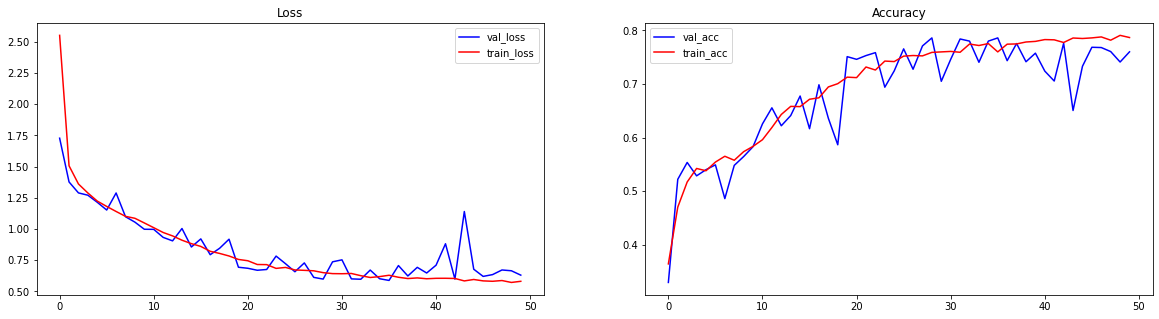

In [182]:
plotting(hist_model1)

### 3. Another layer
- I try to add 1 hidden layer (with 18 units) in order to create a 'deeper' model : maybe it needs more complexity to be more efficient

After a few try to see how many units would be the best, I conclude that the result got better again : especially loss function which converge fast to a low value for both validation and training.

But accuracy is still flucuating a lot ... 


In [186]:
model = keras.Sequential([
      keras.layers.Dense(units=36, activation="relu", input_shape=(36,)),
      keras.layers.Dense(units=18, activation="relu"),
      keras.layers.Dense(units=9, activation="relu"),
      keras.layers.Dense(units=7, activation="softmax")
])

model.compile(
    optimizer="rmsprop", 
    loss="categorical_crossentropy",
    metrics="acc"
)

hist_model2 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test,y_test), verbose=0)

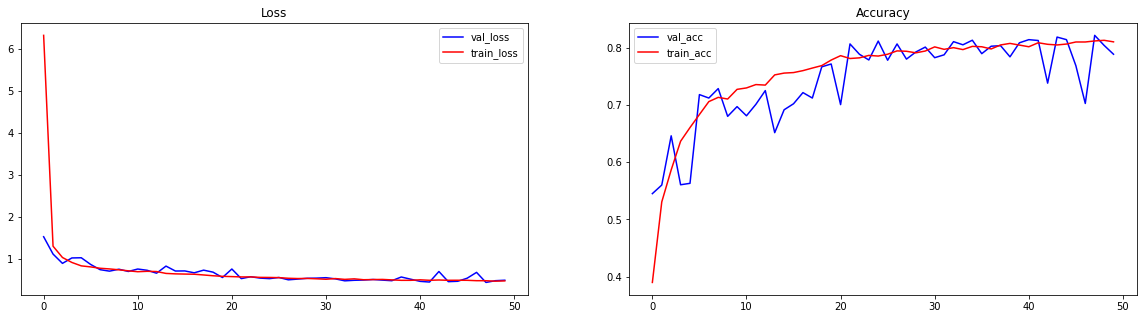

In [187]:
plotting(hist_model2)

### 4. More epochs
- I put the number of epochs from 50 to 100, to see if the accuracy would stop fluctuating.

But we can see that it does not produce any good effect : our model is overfitting and the accuracy is still fluctuacting, even more.
So I decided to stay with 50 epochs : more is not necessary and is even bad for performance.

In [199]:
model = keras.Sequential([
      keras.layers.Dense(units=36, activation="relu", input_shape=(36,)),
      keras.layers.Dense(units=18, activation="relu"),
      keras.layers.Dense(units=9, activation="relu"),
      keras.layers.Dense(units=7, activation="softmax")
])

model.compile(
    optimizer="rmsprop", 
    loss="categorical_crossentropy",
    metrics="acc"
)

hist_model3 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test), verbose=0)

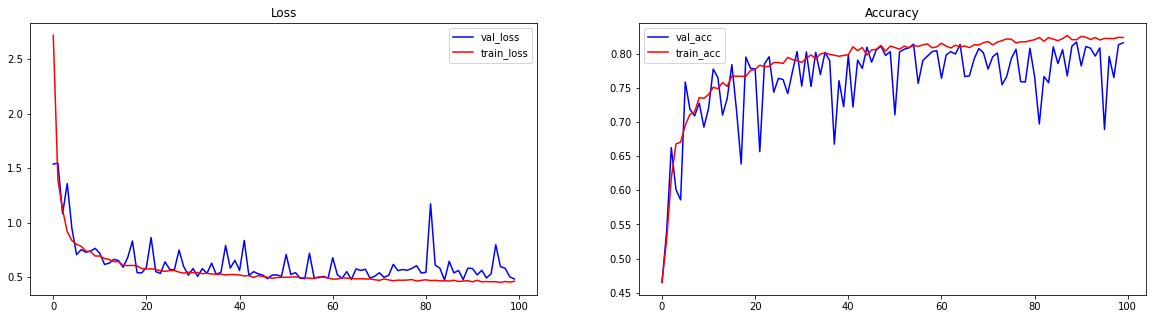

In [200]:
plotting(hist_model3)

### 5. Normalizing !

- I just remembered that I forgot normalizing my data, which is one of the most important thing to do in Deep Learning. 
This is why my accuracy kept fluctuating.

We can see that now the result are much better ! 
We can see though that our model is overfitting : the training accuracy is rising while the validation accuracy is not.


In [239]:
model = keras.Sequential([
      keras.layers.Dense(units=36, activation="relu", input_shape=(36,)),
      keras.layers.Dense(units=18, activation="relu"),
      keras.layers.Dense(units=9, activation="relu"),
      keras.layers.Dense(units=7, activation="softmax")
])

model.compile(
    optimizer="rmsprop", 
    loss="categorical_crossentropy",
    metrics="acc"
)

hist_model4 = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled,y_test), verbose=0)

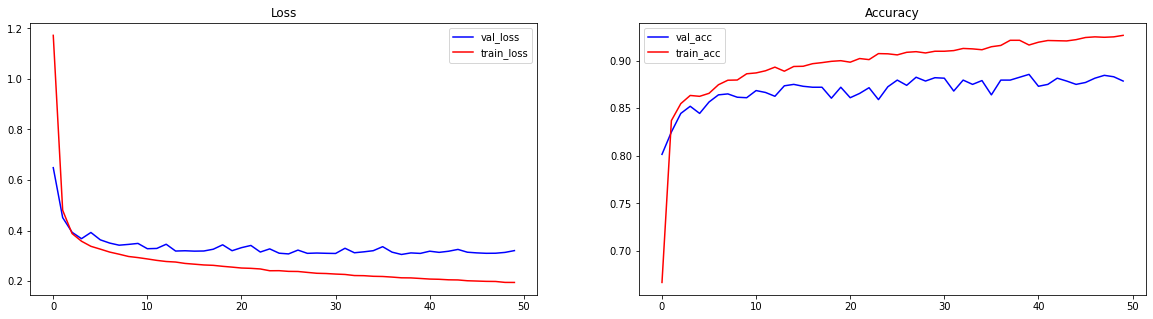

In [240]:
plotting(hist_model4)

### 6. L1 & L2 Regularization

- To prevent overfitting, L1 and L2 regularization are often a good way.

I tried different values for L1 and L2 but 10-3 and 10-4 seem to be very good.

It is better but our model is still overfitting.

In [244]:
model = keras.Sequential([
      keras.layers.Dense(units=36, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-4), input_shape=(36,)),
      keras.layers.Dense(units=18, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-4)),
      keras.layers.Dense(units=9, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-4)),
      keras.layers.Dense(units=7, activation="softmax")
])

model.compile(
    optimizer="rmsprop", 
    loss="categorical_crossentropy",
    metrics="acc"
)

hist_model5 = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled,y_test), verbose=0)

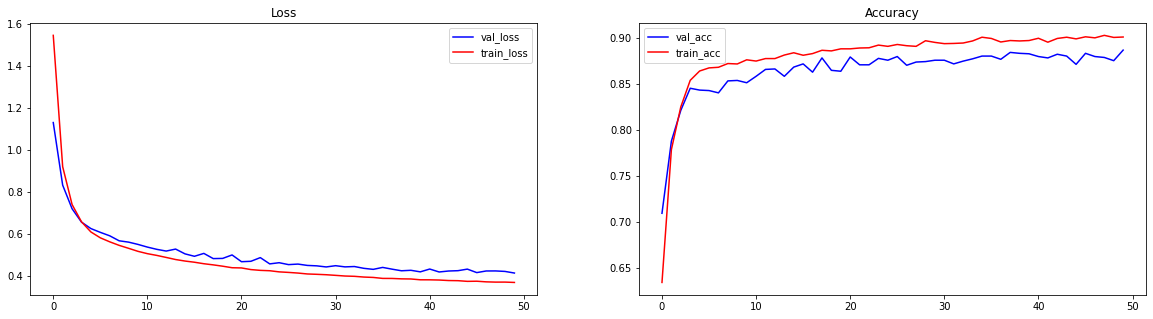

In [245]:
plotting(hist_model5)

### 7. Dropout (Final Model)

- Let's try to add dropout to evidate overfitting, with a rate of 0.3.

We can see that now our model is very efficient and is not overfitting !
We have good results. 

In [251]:
model = keras.Sequential([
      keras.layers.Dense(units=36, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-4), input_shape=(36,)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(units=18, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-4)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(units=9, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-4)),
      keras.layers.Dense(units=7, activation="softmax")
])

model.compile(
    optimizer="rmsprop", 
    loss="categorical_crossentropy",
    metrics="acc"
)

hist_model7 = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled,y_test), verbose=0)

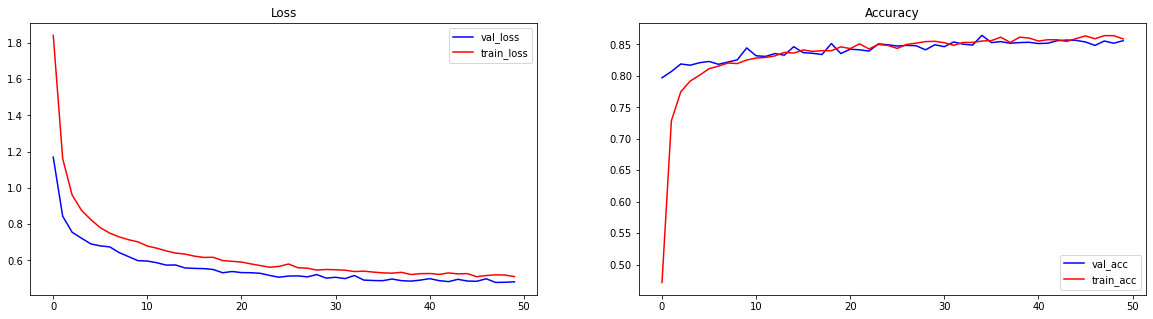

In [252]:
plotting(hist_model7)

## Predictions

In [253]:
predictions = model.predict(X_test_scaled)

In [254]:
predictions

array([[3.11810654e-02, 5.44303912e-05, 9.15884078e-01, ...,
        4.51155414e-04, 1.37741359e-12, 7.45481672e-03],
       [2.80566067e-02, 3.70369271e-05, 9.28538501e-01, ...,
        3.15515819e-04, 4.06900533e-13, 5.64302318e-03],
       [6.64708251e-03, 1.13229355e-04, 6.41976714e-01, ...,
        9.82853002e-04, 7.44854178e-11, 8.87155086e-02],
       ...,
       [9.44776893e-01, 7.34423473e-03, 2.57515069e-03, ...,
        4.49314862e-02, 1.30209177e-10, 7.55737856e-05],
       [7.95733452e-01, 3.97886746e-02, 3.54142440e-03, ...,
        1.57968536e-01, 1.25991440e-09, 7.92282342e-04],
       [5.32013655e-01, 1.31258577e-01, 3.16098216e-04, ...,
        3.35245937e-01, 6.62996481e-12, 4.06268140e-04]], dtype=float32)